In [1]:
from skimage.segmentation import mark_boundaries
from skimage.transform import downscale_local_mean, rotate
import numpy as np
import matplotlib.pyplot as plt
import tifffile
output = "output/"
from scipy import ndimage
import time

In [2]:
low_res_path = ''

high_res_path = ''


file is found!


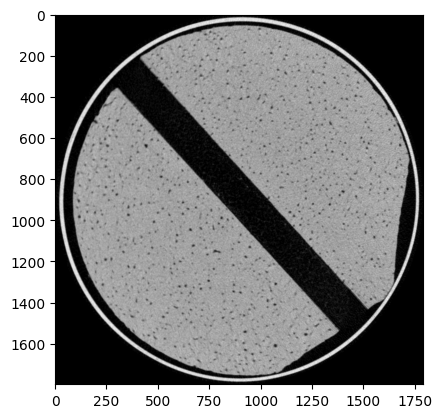

In [3]:
low_res = tifffile.imread(low_res_path)
print ('file is found!')


# If the low res is 120 micro meter then 
# we need to upsample it to 60 micron to have larger grid size
scale = 2.0

upsampled_low_res = ndimage.zoom(low_res,scale, order = 1, prefilter=False, grid_mode=False)
#order = 1 makes biliniar interpolation
low_res_img = upsampled_low_res[0]
plt.imshow(low_res_img,'gray')

In [4]:
tifffile.imwrite(output+low_res_path.split('/')[-1],upsampled_low_res)
print ('Saving is done!')

Saving is done!


In [5]:
# run this cell to free up the ram form low res data
# An image of the upsampled low res is in low_res_img
# to check the rotation angle of the high res in next cells
del upsampled_low_res
del low_res

In [6]:
#preparing the high-res image for 60 micro meter
high_res = tifffile.imread(high_res_path)
print ('file is found!')


t1 = time.time()

file is found!


down sampling done in  8  Minutes


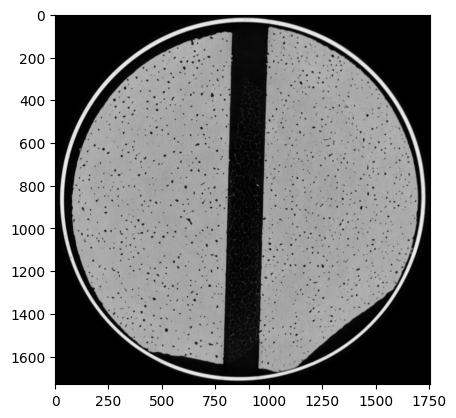

In [7]:


down_scaled = downscale_local_mean(high_res, (2,2,2))

t2 = time.time()
print ('down sampling done in ', round((t2-t1)/60),' Minutes')

plt.imshow(down_scaled[0],'gray')

In [8]:
# free up memory
del high_res

In [9]:
print ('Max pixel intensity = ',down_scaled.max())
# when the high res is not 0-255
# Then need to rescale

Max pixel intensity =  65535.0


In [10]:
def scale_pixel_intensity(image):
    min_val = np.min(image)
    max_val = np.max(image)
    
    scaled_image = 255 * (image - min_val) / (max_val - min_val)
    
    return scaled_image.astype(np.uint8)

# Example usage with a grayscale image (replace 'your_image' with your actual image array):
# your_image = ...

scaled_image = scale_pixel_intensity(down_scaled)
print ('Max pixel intensity = ',scaled_image.max())

Max pixel intensity =  255


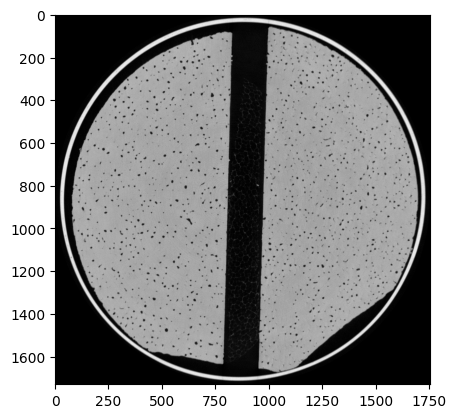

In [11]:
plt.imshow(scaled_image[0],'gray')

In [12]:
angle = 40
rotated = np.zeros((4,int(scaled_image.shape[1]*1.5),int(scaled_image.shape[2]*1.5)), dtype='uint8')
for i in range (2):  #rotating one layer to check
    rotated_2d = rotate(scaled_image[i], angle=angle, resize=True, center=None,
                     order=None, mode='constant', cval=0, clip=False, preserve_range=True)
    rotated[i,:rotated_2d.shape[0],:rotated_2d.shape[1]] = rotated_2d




Text(0.5, 1.0, 'down_scaled_high_res')

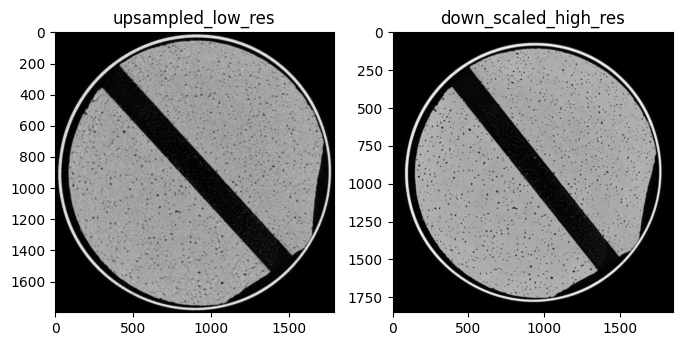

In [14]:

Image1 = low_res_img
Image2 = rotated[0,300:2150,300:2150]

fig = plt.figure(figsize=(8, 8)) 
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1) 
# showing image 
plt.imshow(Image1,'gray') 
#plt.axis('off') 
plt.title("upsampled_low_res") 

fig.add_subplot(rows, columns, 2) 
# showing image 
plt.imshow(Image2,'gray') 
#plt.axis('off') 
plt.title("down_scaled_high_res") 

In [15]:
# When the angle is correct then run this cell to rotate all

rotated = np.zeros((scaled_image.shape[0],int(scaled_image.shape[1]*1.5),int(scaled_image.shape[2]*1.5)), dtype='uint8')
for i in range (rotated.shape[0]): #rotating all layers
    print (round (i*100/rotated.shape[0]),'%',end='\r')
    rotated_2d = rotate(scaled_image[i], angle=angle, resize=True, center=None,
                     order=None, mode='constant', cval=0, clip=False, preserve_range=True)
    rotated[i,:rotated_2d.shape[0],:rotated_2d.shape[1]] = rotated_2d


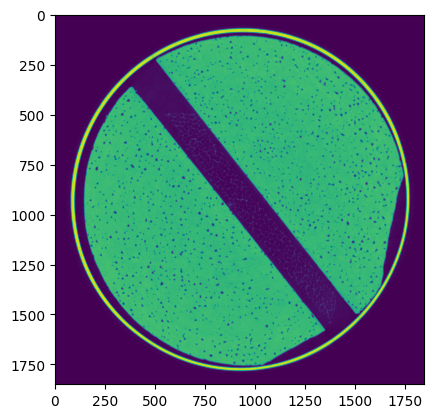

In [17]:
plt.imshow(rotated[400,300:2150,300:2150])

In [18]:
tifffile.imwrite(output+high_res_path.split('/')[-1], rotated[:,300:2150,300:2150] )
print ('Saving done!')

Saving done!
